# Project: Investigate a Dataset- No-show Appointment Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The No-show appointment dataset holds data from over 100,000 medical appointments in Brazil. The dataset has a total of 14 columns as listed below:

**1** Patient ID- this holds data of the patient ID numbers.

**2** Appointment ID- these numbers are all supposed to be unique as it holds a 
different appointments tied to a particular patient.

**3** Gender- this says if a patient is male of female

**4** Scheduled Day- gives details regarding the appointment.

**5** Appointment Day- gives details regarding the appointment.

**6** Age- holds data regarding patient age.

**7** Neighbourhod- holds data for patients neighbourhood.

**8** Scholarship- says if the patient is part of the Bolsa Familia welfare progem.

**9** Hipertension- says if a patient suffers hipertension or not

**10** Alcoholism- says if a patient suffers alcoholism or not

**11** Diabetes- says if a patient suffers diabetes or not

**12** Handcap- says if a patient is handicap or not

**13** SMS_received- says if a patient received an SMS

**14** No-show- tells if the patient made it to the appointment. No, means he made it.


### Question(s) for Analysis

From the No-show appointments dataset, some of the questions that I intend to answer are below:

**1** What percentage of patients show up?

**2** Does gender affect whether a patient shows up?

**3** Does age affect whether a patient shows up?

**4** Does benefiting from the Bolsa Familia meaan more show ups?

**5** Does receiving an SMS with instructions affect people showing up?

In [270]:
# import pandas, numpy and matplotlib.pyplot
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="dark", color_codes=True)

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [271]:
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv('noshowappointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [272]:
# Check the data for missing data, number of entries and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [273]:
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

The dataset has no missing data. It contains 110,527 data entries.
Next check for number of rows and columns:

In [274]:
# Confirm shape of the dataframe
df.shape

(110527, 14)

There are 110527 rows and 14 columns in the dataset.
Next find out the total number of unique entries per column:

In [275]:
# Check for the number of unique entries per column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

There seems to be 62,299 patients in the dataset who had 110527 scheduled appointments. Next check for duplicated data:

In [276]:
# Check if there are any duplicated entries
sum(df.duplicated())

0

The dataset has no duplicate entries. Next, we get a general statistical overview of the dataset below:

In [277]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Data Cleaning 

The titles for the columns are somewhat wrong. "Handcap" and "Hipertension" are spelt wrong for instance. It would be great to correct these as well as put the titles all in small letter using underscore to separate words.

In [278]:
#Check for duplication
df.duplicated().sum()

0

In [279]:
# See name of columns
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [280]:
# See name of columns
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [281]:
# Rename the columns
new_column_names = {'PatientId' : 'patient_id', 'AppointmentID' : 'appointment_id', 'Gender' : 'gender', 'ScheduledDay' : 'schedule_day', 'AppointmentDay' : 'appointment_day', 'Age' : 'age', 'Neighbourhood' : 'neighbourhood', 'Scholarship' : 'scholarship', 'Hipertension' : 'hypertension', 'Diabetes' : 'diabetes', 'Alcoholism' : 'alcoholism', 'Handcap' : 'handicap', 'SMS_received' : 'sms_received', 'No-show' : 'no_show'}
df.rename(columns= new_column_names, inplace=True)
df.head(1)

,patient_id,appointment_id,gender,schedule_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [282]:
# Check for duplicated appointment ID
df['appointment_id'].duplicated().sum()

0

No appointment IDs are duplicated so each appointment stands alone.

In [283]:
# Look at statistical variables again
df.describe()

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In the age column, we see that the minimum age is -1. As an individual cannot be aged 0 or less, we check the dataset to see how many entries have 0 as the age. Using a dataset with incorrect ages may affect conclusions drawn from the data.

In [284]:
# Check for the age that is -1
(df['age'] == -1).sum()

1

In [285]:
# Check for ages that are zero
(df['age'] == 0).sum()

3539

In [286]:
# find the row with the age -1
df.loc[df['age'] == -1]

,patient_id,appointment_id,gender,schedule_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [287]:
# Drop the row with -1 for an entry for age
df.drop(df.loc[df['age'] == -1].index, inplace=True)

# Check to confirm it has been dropped
df.loc[df['age'] == -1]

,patient_id,appointment_id,gender,schedule_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show


In [288]:
# find the row with the age 0
df.loc[df['age'] == 0]

,patient_id,appointment_id,gender,schedule_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
59,7.184428e+13,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110345,1.473952e+14,5702537,F,2016-05-16T12:30:58Z,2016-06-01T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110346,5.577525e+12,5777724,M,2016-06-06T14:22:34Z,2016-06-08T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110454,6.142460e+11,5772400,F,2016-06-03T15:18:44Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110460,4.321846e+13,5769545,F,2016-06-03T08:56:51Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No


In [289]:
# Drop the row with -1 for an entry for age
df.drop(df.loc[df['age'] == 0].index, inplace=True)

# Check to confirm it has been dropped
df.loc[df['age'] == 0]

,patient_id,appointment_id,gender,schedule_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show


In [290]:
# Check the data again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106987 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   patient_id       106987 non-null  float64
 1   appointment_id   106987 non-null  int64  
 2   gender           106987 non-null  object 
 3   schedule_day     106987 non-null  object 
 4   appointment_day  106987 non-null  object 
 5   age              106987 non-null  int64  
 6   neighbourhood    106987 non-null  object 
 7   scholarship      106987 non-null  int64  
 8   hypertension     106987 non-null  int64  
 9   diabetes         106987 non-null  int64  
 10  alcoholism       106987 non-null  int64  
 11  handicap         106987 non-null  int64  
 12  sms_received     106987 non-null  int64  
 13  no_show          106987 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.2+ MB


In [291]:
# Check statistics of dataset again()
df.describe()

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,1.069870e+05,1.069870e+05,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000
mean,1.472814e+14,5.675434e+06,38.316085,0.101031,0.203772,0.074243,0.031406,0.022975,0.323264
std,2.558267e+14,7.133274e+04,22.466214,0.301371,0.402804,0.262167,0.174412,0.164115,0.467725
min,3.921784e+04,5.030230e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.173523e+12,5.640490e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.172463e+13,5.680744e+06,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.433600e+13,5.725634e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The minimum age is now 1 and the median age is 38, the mean age is about 38 while the maximum age is 115.

In [292]:
# Check patient ID for duplication
df['patient_id'].duplicated().sum()

46717

In [293]:
# Check Unique patient IDs
df['patient_id'].nunique()

60270

I will be leaving the duplicated patient IDs as the dataset is focused on measuring if patients show up to appointments or not. Removing duplicate patient IDs does not give a good idea of how many appointments were shown up for. I understand that one can argue that duplicate patient IDs might result in duplicate entries all through for the patient. But if we look at duplications in Schedule Day and Appointment Day, it does not add up to the same number of duplications in Patient IDs, which tells me it is possible that the patients were returning patients and had been given new dates. It will skew the dataset wrongly to completely drop the duplicated patient IDs.

Had the analysis for the dataset been to see what unique patients have for instance diabetes, or are handicapped, then dropping the duplicated patient IDs will be more appealing

In [294]:
# Check number of unique Scehdule Days
df['schedule_day'].nunique()

100307

In [295]:
# Check for duplicated Schedule Days
df['schedule_day'].duplicated().sum()

6680

In [296]:
# Check for number of unique Appointment Days
df['appointment_day'].nunique()

27

In [297]:
# Check for number of unique Appointment IDs
df['appointment_id'].nunique()

106987

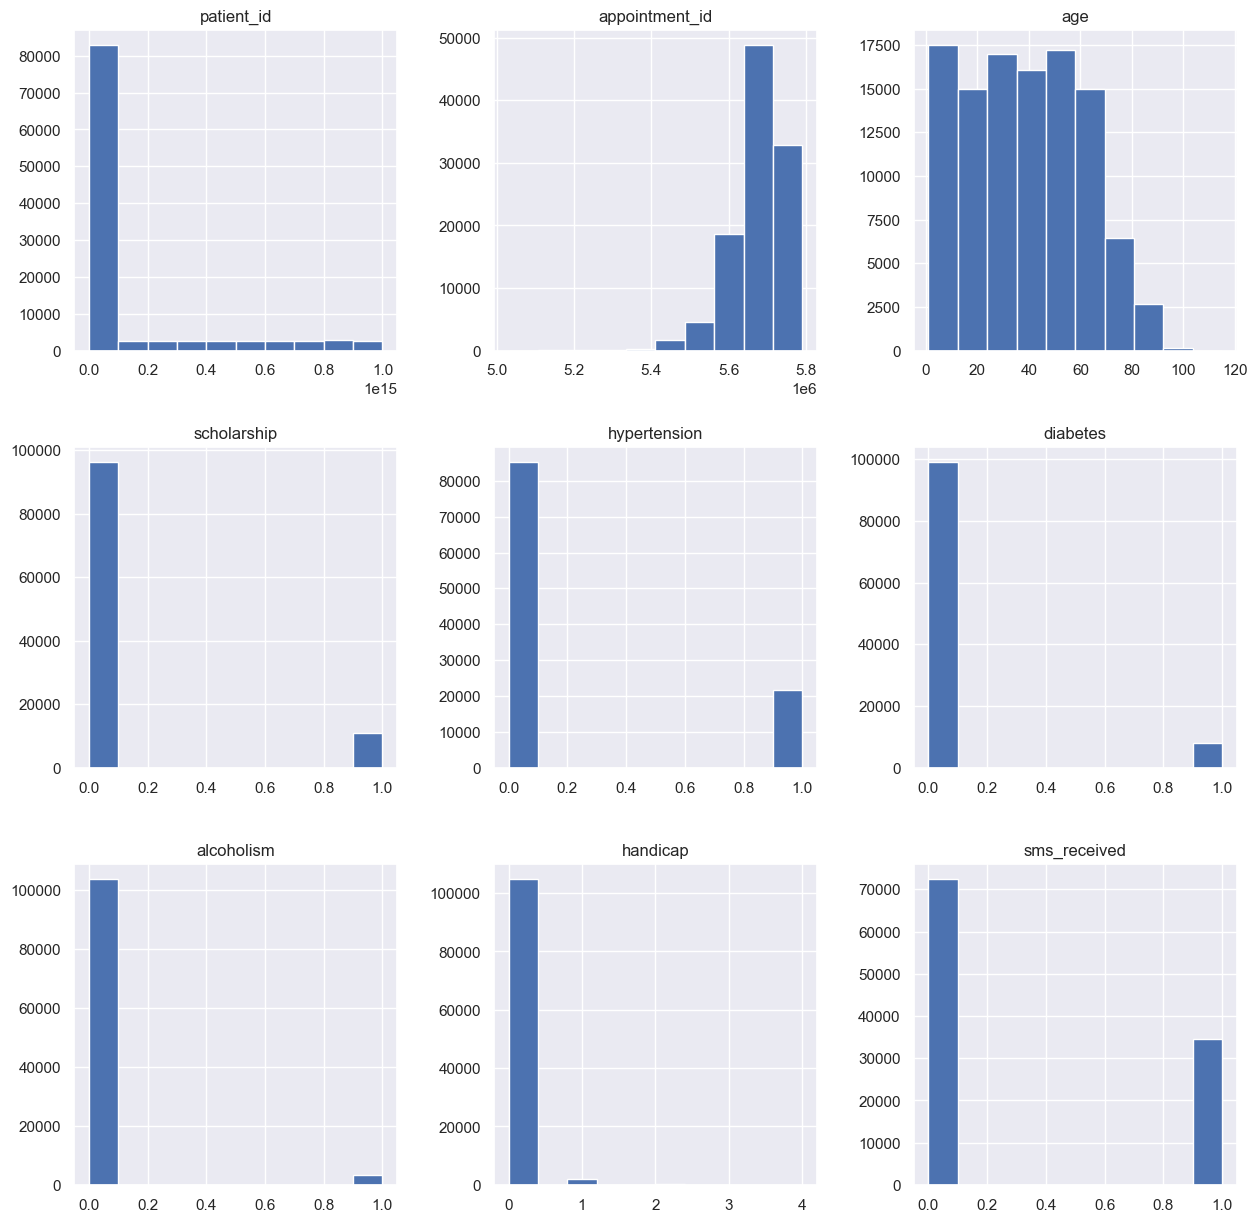

In [298]:
#Visualize some Characterstics of the Data
df.hist(figsize= (15,15));

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1- What percentage of patients show up?

In [299]:
# Confirm the total number of entries in the no_show column 
df['no_show'].info()

<class 'pandas.core.series.Series'>
Int64Index: 106987 entries, 0 to 110526
Series name: no_show
Non-Null Count   Dtype 
--------------   ----- 
106987 non-null  object
dtypes: object(1)
memory usage: 1.6+ MB


In [300]:
# See the value_counts for the no-show column
df['no_show'].value_counts()

No     85307
Yes    21680
Name: no_show, dtype: int64

In [301]:
# Collect value_counts into new variable
no_show_counts = df['no_show'].value_counts()
no_show_counts

No     85307
Yes    21680
Name: no_show, dtype: int64

In [302]:
# Collect values of patients that showed up (No) in new variable
show_up = no_show_counts['No']
show_up

85307

In [303]:
# Collect values of patients that did not show up (Yes) in new variable
no_show_up = no_show_counts['Yes']
no_show_up

21680

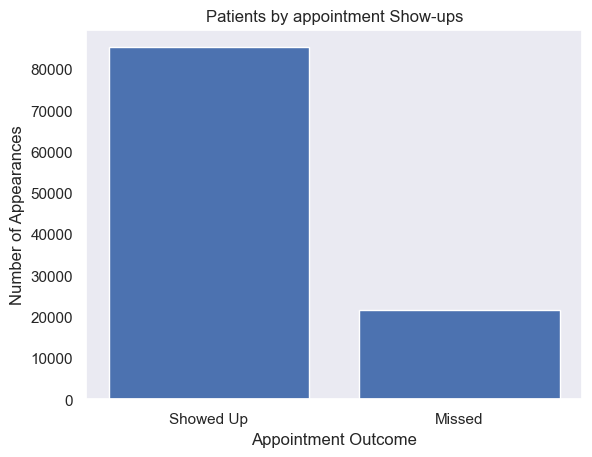

In [304]:
# Graph showing frequency of show-ups
locations = [1, 2]
heights = [show_up, no_show_up]
labels = ['Showed Up', 'Missed']
plt.bar(locations, heights, tick_label=labels)
plt.title('Patients by appointment Show-ups')
plt.xlabel('Appointment Outcome')
plt.ylabel('Number of Appearances');

In [305]:
# Calculate percentage of Show-ups
percentage_show_up = (show_up/df['no_show'].count())*100
percentage_show_up

79.73585575817623

The graph and the percentages show that about roughly 80% of the patients showed up for their appointments, leaving what seems to be about 20% of participants not showing up for their appointments. We should then investigate why they do not show up for appointments.

### Research Question 2- Does gender affect whether a patient shows up?

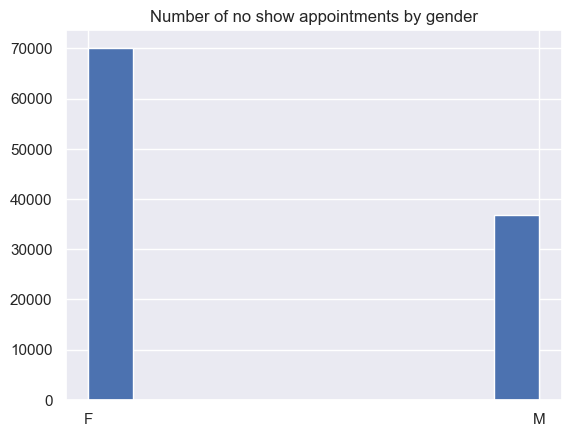

In [306]:
# Which gender makes up most patients
df['gender'].hist()
plt.title('Number of no show appointments by gender');

Most of the patients in the dataset are female.

In [307]:
# Create a new dataframe with gender and no_show
gender_show = df[['gender', 'no_show']]
gender_show.head()

,gender,no_show
0,F,No
1,M,No
2,F,No
3,F,No
4,F,No


In [308]:
gender_show_count = gender_show.groupby('gender').no_show.value_counts()
gender_show_count

gender  no_show
F       No         55843
        Yes        14275
M       No         29464
        Yes         7405
Name: no_show, dtype: int64

The results from the value counts by gender seem to suggest that more females miss appointments. However, the dataset has more patients who are female. So, what proportion of females to proportion of men miss appointments?

In [309]:
# Select the counts for Female
female_count = gender_show_count['F']
female_count

no_show
No     55843
Yes    14275
Name: no_show, dtype: int64

In [310]:
female_show = female_count['No']
female_show

55843

In [311]:
female_no_show = female_count['Yes']
female_no_show

14275

In [312]:
#Total numnber of females
df['gender'].value_counts()['F']

70118

In [313]:
# Proportion of females not showing up
prop_female = (female_no_show/df['gender'].value_counts()['F'])*100
prop_female

20.358538463732565

In [314]:
# Select the counts for Female
male_count = gender_show_count['M']
male_count

no_show
No     29464
Yes     7405
Name: no_show, dtype: int64

In [315]:
male_show = male_count['No']
male_show

29464

In [316]:
male_no_show = male_count['Yes']
male_no_show

7405

In [317]:
# Total of males in the dataset
df['gender'].value_counts()['M']

36869

In [318]:
# Proportion of males not showing up
prop_male = (male_no_show/df['gender'].value_counts()['M'])*100
prop_male

20.084623938810385

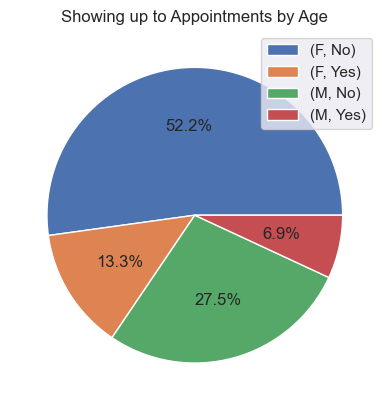

In [319]:
# Chart of no_show appointments by gender
df.groupby('gender').no_show.value_counts().plot(kind='pie', autopct='%1.1f%%', legend=True, title='Showing up to Appointments by Age', ylabel='', labeldistance=None);

Looking at the pie chart above, we get a sense that there are more female patients not showing up to appointments than there are male patients. However, it is also important that we look at the proportion of female patients not shwoing up in comparison to the proportion of male patients to get a better sense of how gender affects showing up for appointments.

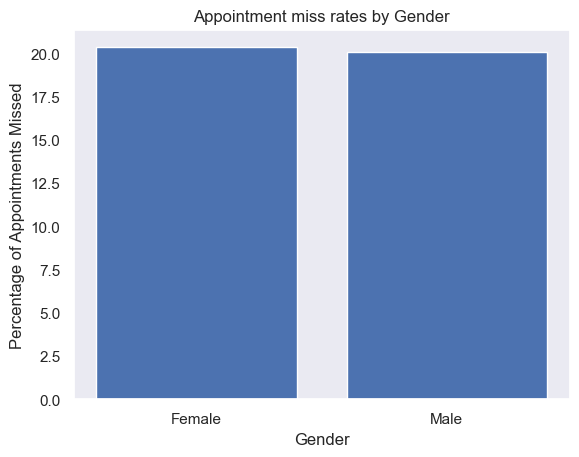

In [320]:
# Plot a graph showing no-shows by proportion of no-shows by gender
locations = [1, 2]
heights = [prop_female, prop_male]
labels = ['Female', 'Male']
plt.bar(locations, heights, tick_label=labels)
plt.title('Appointment miss rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage of Appointments Missed');

From this we can draw a tentative and speculative conclusion that the gender of the patient has no real bearing to whether the patients show up for their appointments or they do not. The graph and percentage differences show an almost 20% no-show up rate across both genders.

### Research Question 3- Does age affect whether a patient shows up?

In [321]:
# Get a statistical distribution of patient ages
df['age'].describe()

count    106987.000000
mean         38.316085
std          22.466214
min           1.000000
25%          19.000000
50%          38.000000
75%          56.000000
max         115.000000
Name: age, dtype: float64

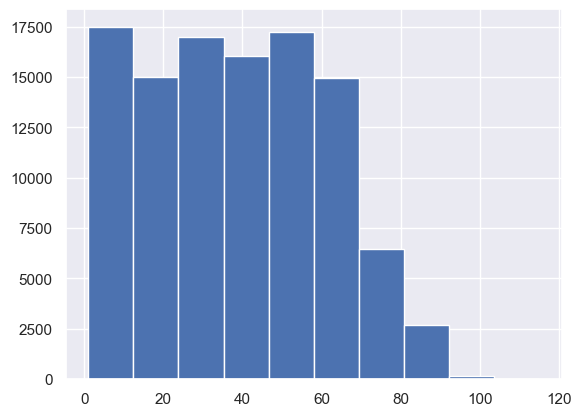

In [322]:
# Histogram showing age distibution
df['age'].hist();

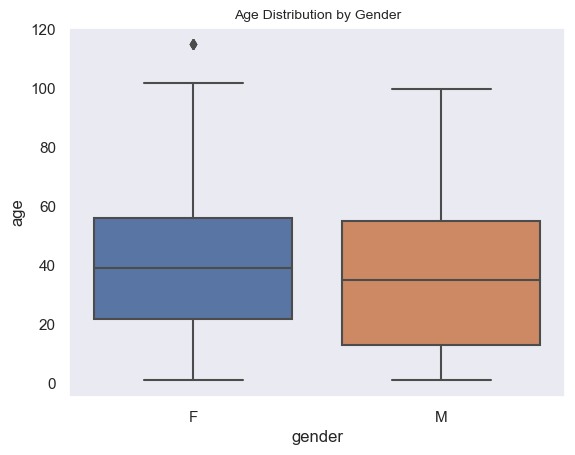

In [323]:
# age by gender
sns.boxplot(x="gender", y="age", data=df)
plt.title('Age Distribution by Gender', size = 10);

The Median age of the female patients is higher than that of the male patients. Suggesting that on average, the female patients might be older than the male patients.

In [324]:
# Create masks for the dataset using query- younger patients
younger_patients = df.query('age < 38')
younger_patients

,patient_id,appointment_id,gender,schedule_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No
10,7.345362e+14,5630213,F,2016-04-27T14:58:11Z,2016-04-29T00:00:00Z,30,NOVA PALESTINA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110515,6.456342e+14,5778621,M,2016-06-06T15:58:05Z,2016-06-08T00:00:00Z,33,MARIA ORTIZ,0,1,0,0,0,0,Yes
110516,6.923772e+13,5780205,F,2016-06-07T07:45:16Z,2016-06-08T00:00:00Z,37,MARIA ORTIZ,0,0,0,0,0,0,Yes
110517,5.574942e+12,5780122,F,2016-06-07T07:38:34Z,2016-06-07T00:00:00Z,19,MARIA ORTIZ,0,0,0,0,0,0,No
110519,6.542388e+13,5630447,F,2016-04-27T15:23:14Z,2016-06-07T00:00:00Z,22,MARIA ORTIZ,0,0,0,0,0,1,No


In [325]:
# Create masks for the dataset using query- older patients
older_patients = df.query('age >= 38')
older_patients

,patient_id,appointment_id,gender,schedule_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110521,3.635534e+13,5651072,F,2016-05-03T08:23:40Z,2016-06-07T00:00:00Z,53,MARIA ORTIZ,0,0,0,0,0,1,No
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [326]:
younger_patients.count()

patient_id         52577
appointment_id     52577
gender             52577
schedule_day       52577
appointment_day    52577
age                52577
neighbourhood      52577
scholarship        52577
hypertension       52577
diabetes           52577
alcoholism         52577
handicap           52577
sms_received       52577
no_show            52577
dtype: int64

In [327]:
older_patients.count()

patient_id         54410
appointment_id     54410
gender             54410
schedule_day       54410
appointment_day    54410
age                54410
neighbourhood      54410
scholarship        54410
hypertension       54410
diabetes           54410
alcoholism         54410
handicap           54410
sms_received       54410
no_show            54410
dtype: int64

There are more patients aged above 38.

In [328]:
# Count the number of young patients showing up or missing appointments
younger_patients['no_show'].value_counts()

No     40455
Yes    12122
Name: no_show, dtype: int64

In [329]:
# Count the number of old patients showing up or missing appointments
older_patients['no_show'].value_counts()

No     44852
Yes     9558
Name: no_show, dtype: int64

The counts seem to show that younger patients miss more appointments than older patients. Let us look at this in proportions.

In [330]:
# Define a fucntion to calculate the proportions
def calculate_proportion(df):
    '''to calculate the proportion of occurrence of data in a column'''
    first_count = df.no_show.value_counts()['No']
    second_count = df.no_show.value_counts()['Yes']
    total_count = df.no_show.count()
    first_proportion = (first_count/total_count)*100
    second_proportion = (second_count/total_count)*100
    return first_proportion, second_proportion

In [331]:
# Calculate the proportion of older patients that missed the appointment
showed_up, older_prop = calculate_proportion(older_patients)
older_prop

17.56662378239294

In [332]:
# Calculate the proportion of younger patients that missed the appointment
showed_up, younger_prop = calculate_proportion(younger_patients)
younger_prop

23.055708769994485

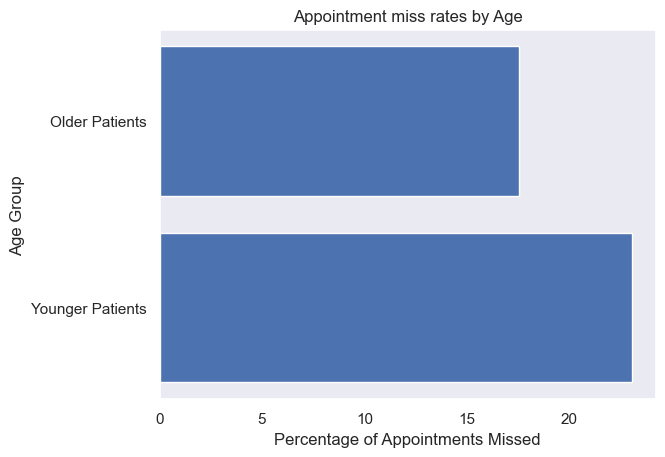

In [333]:
#Plot a graph showing no-shows by proportion of no-shows by age group
locations = [1, 2]
heights = [younger_prop, older_prop]
labels = ['Younger Patients', 'Older Patients']
plt.barh(locations, heights, tick_label=labels)
plt.title('Appointment miss rates by Age')
plt.xlabel('Percentage of Appointments Missed')
plt.ylabel('Age Group');

Age seems to have an effect on whether patients show up for appointments. The younger the patient, the seeming likelihood for them not to show up to appointments.

### Research Question 4- Does benefiting from the Bolsa Familia mean more show ups?

In [334]:
df['scholarship'].value_counts()

0    96178
1    10809
Name: scholarship, dtype: int64

The number of patients enrolled in Bolsa Familia are fewer than those not enrolled.

In [335]:
# Select those that are enrolled in the welfare program
enrollee = df.query('scholarship == 1')
enrollee.head()

,patient_id,appointment_id,gender,schedule_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
12,5.666548e+14,5634718,F,2016-04-28T11:33:51Z,2016-04-29T00:00:00Z,22,NOVA PALESTINA,1,0,0,0,0,0,No
17,1.479497e+13,5633460,F,2016-04-28T09:28:57Z,2016-04-29T00:00:00Z,40,CONQUISTA,1,0,0,0,0,0,Yes
18,1.713538e+13,5621836,F,2016-04-26T10:54:18Z,2016-04-29T00:00:00Z,30,NOVA PALESTINA,1,0,0,0,0,1,No
31,3.112849e+11,5628907,M,2016-04-27T12:07:14Z,2016-04-29T00:00:00Z,12,NOVA PALESTINA,1,0,0,0,0,0,Yes
33,7.653517e+12,5616921,F,2016-04-25T15:01:04Z,2016-04-29T00:00:00Z,38,SÃO CRISTÓVÃO,1,0,0,0,0,1,No


In [336]:
# Select those that are not enrolled in the welfare program
non_enrollee = df.query('scholarship == 0')
non_enrollee.head()

,patient_id,appointment_id,gender,schedule_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [337]:
# Count the number of enrolled patients showing up or missing appointments
enrollee['no_show'].value_counts()

No     8238
Yes    2571
Name: no_show, dtype: int64

In [338]:
# Count the number of non-enrolled patients showing up or missing appointments
non_enrollee['no_show'].value_counts()

No     77069
Yes    19109
Name: no_show, dtype: int64

In [339]:
# Calculate the proportion of scholarship enrollees that missed the appointment
showed_up, enrollee_prop = calculate_proportion(enrollee)
enrollee_prop

23.7857341104635

In [340]:
# Calculate the proportion of non enrollee patients to the scholarship that missed the appointment
showed_up, non_enrollee_prop = calculate_proportion(non_enrollee)
non_enrollee_prop

19.8683690656907

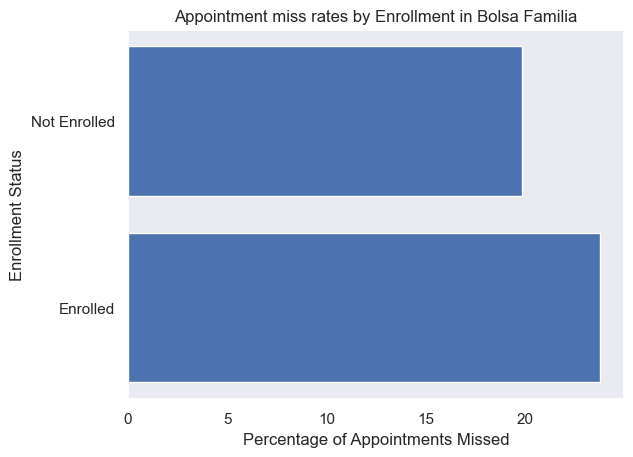

In [341]:
#Plot a graph showing no-shows by proportion of no-shows by Enrollment in the welfare program
locations = [1, 2]
heights = [enrollee_prop, non_enrollee_prop]
labels = ['Enrolled', 'Not Enrolled']
plt.barh(locations, heights, tick_label=labels)
plt.title('Appointment miss rates by Enrollment in Bolsa Familia')
plt.xlabel('Percentage of Appointments Missed')
plt.ylabel('Enrollment Status');

A higher percentage of patients enrolled in Bolsa Familia do not show up for their appointments than those who are not enrolled.

### Research Question 5- Does receiving an SMS with instructions affect people showing up?

In [342]:
df['sms_received'].value_counts()

0    72402
1    34585
Name: sms_received, dtype: int64

In [343]:
# Select those that recieved an SMS
received_sms = df.query('sms_received == 1')
received_sms.head()

,patient_id,appointment_id,gender,schedule_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
11,7.542951e+12,5620163,M,2016-04-26T08:44:12Z,2016-04-29T00:00:00Z,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
15,9.994839e+10,5620206,F,2016-04-26T08:47:27Z,2016-04-29T00:00:00Z,15,NOVA PALESTINA,0,0,0,0,0,1,No
18,1.713538e+13,5621836,F,2016-04-26T10:54:18Z,2016-04-29T00:00:00Z,30,NOVA PALESTINA,1,0,0,0,0,1,No
22,8.632298e+14,5616091,M,2016-04-25T13:29:16Z,2016-04-29T00:00:00Z,13,CONQUISTA,0,0,0,0,0,1,Yes
25,5.819370e+12,5624020,M,2016-04-26T15:04:17Z,2016-04-29T00:00:00Z,46,CONQUISTA,0,1,0,0,0,1,No


In [344]:
# Select those that did not recieve an SMS
no_sms = df.query('sms_received == 0')
no_sms.head()

,patient_id,appointment_id,gender,schedule_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [345]:
# Count the number of patients who received an SMS showing up or missing appointments
received_sms['no_show'].value_counts()

No     25017
Yes     9568
Name: no_show, dtype: int64

In [346]:
# Count the number of patients who did not receive an SMS showing up or missing appointments
no_sms['no_show'].value_counts()

No     60290
Yes    12112
Name: no_show, dtype: int64

There seems to be more patients who do not receive an SMS not showing up to their appointments. Let us look at the proportions as well, as there are generally more patients who do not receive SMS to those that do.

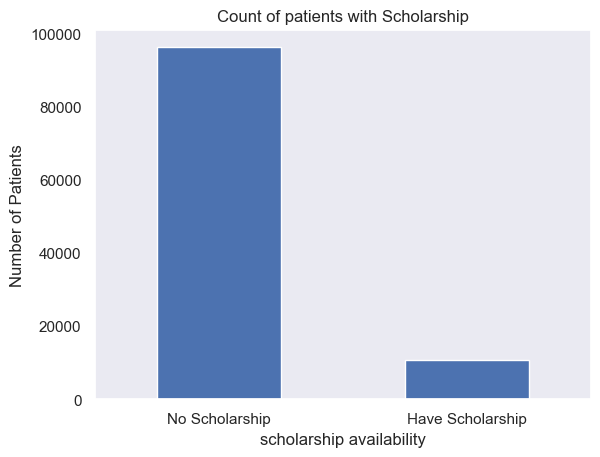

In [347]:
df['scholarship'].value_counts().plot(kind='bar')
plt.xlabel('scholarship availability')
plt.xticks([0,1], ['No Scholarship', 'Have Scholarship'], rotation=0)
plt.ylabel('Number of Patients')
plt.title('Count of patients with Scholarship');

The graph agrees with the initial counts. There are more people who do not receive the SMS than those who receive an SMS. Let us see the proportions to get a clearer picture.

In [348]:
# Get propotions of those that recieved an SMS who do not show up
showed_up, received_prop = calculate_proportion(received_sms)
received_prop

27.665172762758424

In [349]:
# Get propotions of those that did not recieve an SMS who do not show up
showed_up, no_sms_prop = calculate_proportion(no_sms)
no_sms_prop

16.728819645866135

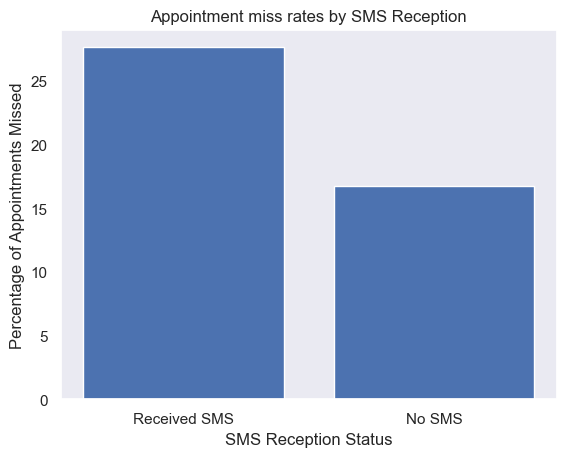

In [350]:
#Plot a graph showing no-shows by proportion of no-shows by receipt of SMS
locations = [1, 2]
heights = [received_prop, no_sms_prop]
labels = ['Received SMS', 'No SMS']
plt.bar(locations, heights, tick_label=labels)
plt.title('Appointment miss rates by SMS Reception')
plt.xlabel('SMS Reception Status')
plt.ylabel('Percentage of Appointments Missed');

A higher proportion of patients who received an SMS did not show up to their appointments.

<a id='conclusions'></a>
## Conclusions

From this no-show appointment datasets, after, wrangling and cleaning, we have learnt that:
1. There are more female patients.
2. Age does not show a clear effect on whether patients show up to appointments.
3. The patients who receive an SMS seem more likely to not show up to appointments.
4. The members of the Bolsa Familia seem more likely not to show up to appointments.
5. And finally, younger patients seem less lekely to show up to appointments.

This data analysis has the following limitations:
1. There are duplicates of patient ID so we have not looked at individual patient behaviour here but general attitude to appointments.
2. The analysis has not looked at neighbourhood in which patients live nor how suffering from an illness like hypertension, diabetes, alcoholism or being handicapped can affect showing up. 